# IMPORTING THE DATA FROM SENSOR READINGS FILE

In [ ]:
import pandas as pd
import numpy as np

df = pd.read_csv('/content/sensor_data.csv')
df

,time,fsrReading
0,1.682883e+09,0.0
1,1.682883e+09,0.0
2,1.682883e+09,0.0
3,1.682883e+09,0.0
4,1.682883e+09,0.0
...,...,...
669,1.682883e+09,0.0
670,1.682883e+09,0.0
671,1.682883e+09,0.0
672,1.682883e+09,0.0


# PLOTTING THE ORIGINAL SIGNAL

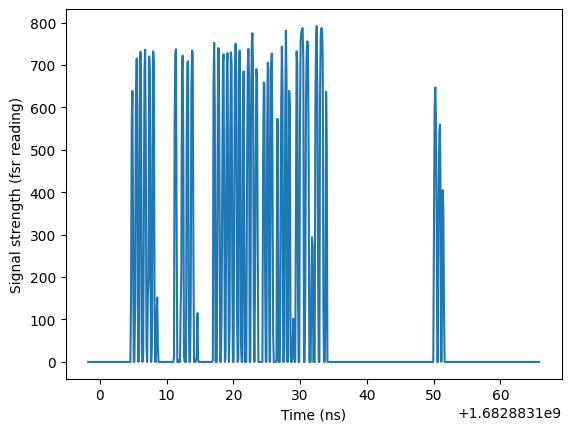

In [ ]:
import matplotlib.pyplot as plt

import numpy as np

time = df.iloc[:, 0]
readings = df.iloc[:, 1]

plt.plot(time,readings)
plt.xlabel("Time (ns)")
plt.ylabel("Signal strength (fsr reading)")
plt.show()

# GENERAL ANALYSIS 

In [ ]:
max_signal = max(readings)
print("Maximum value of FSR reading = ",max_signal)

min_signal = min(readings)
print("Minimum value of FSR reading = ",min_signal)

Maximum value of FSR reading =  792.0
Minimum value of FSR reading =  0.0


# FOURIER FROM SCRATCH

In [ ]:
def fourier_transform(time, readings, w_values):
    result = np.zeros_like(w_values, dtype=np.complex)
    dt = time[1] - time[0]
    for i, w in enumerate(w_values):
        integrand = np.exp(-1j * w * time) * readings
        result[i] = np.trapz(integrand, dx=dt)
    return result


# trapz() method is used to compute integration along a specified axis using the composite trapezoidal rule. 
# Here we have used the axis 't'.

In [ ]:
w_values = np.linspace(-0,700, 1000)
reading_fourier = fourier_transform(time, readings, w_values)


<ipython-input-5-c24b62f8644b>:2: DeprecationWarning: `np.complex` is a deprecated alias for the builtin `complex`. To silence this warning, use `complex` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.complex128` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  result = np.zeros_like(w_values, dtype=np.complex)


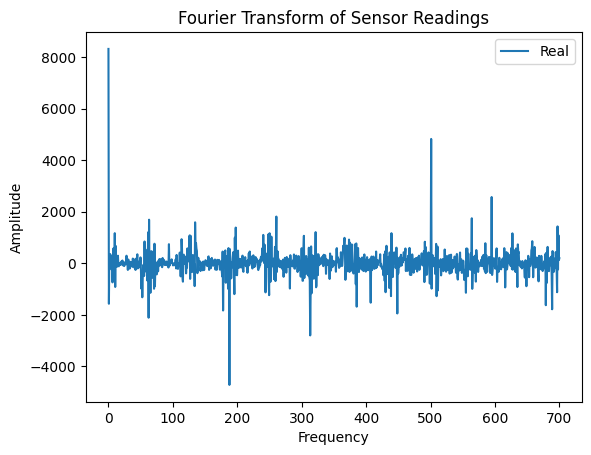

In [ ]:
import matplotlib.pyplot as plt

plt.plot(w_values, reading_fourier.real, label='Real')
# plt.plot(w_values, reading_fourier.imag, label='Imaginary')
plt.title('Fourier Transform of Sensor Readings')
plt.xlabel('Frequency')
plt.ylabel('Amplitude')
plt.legend()
plt.show()


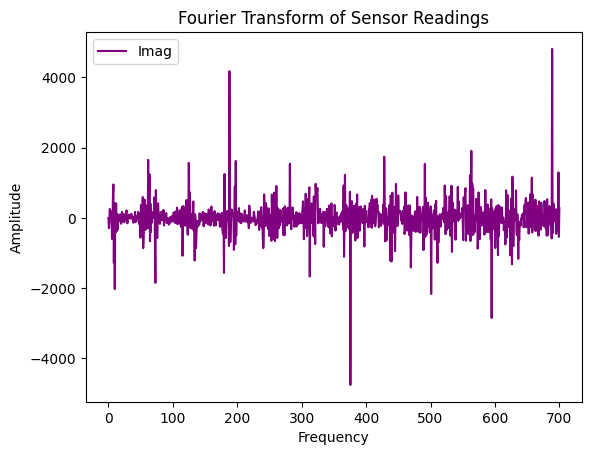

In [ ]:
plt.plot(w_values, reading_fourier.imag, label='Imag',c='purple')
plt.title('Fourier Transform of Sensor Readings')
plt.xlabel('Frequency')
plt.ylabel('Amplitude')
plt.legend()
plt.show()

# Power generated by the signal

In [ ]:
power_spectrum = np.abs(reading_fourier) ** 2

# Calculate the total power of the signal
total_power = np.sum(power_spectrum) / len(time)

print("Total power of the signal: {:.2f}".format(total_power))

Total power of the signal: 794918.63


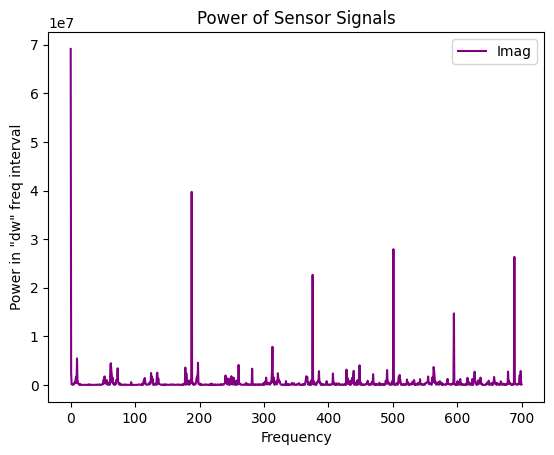

In [ ]:
plt.plot(w_values, power_spectrum, label='Imag',c='purple')
plt.title('Power of Sensor Signals')
plt.xlabel('Frequency')
plt.ylabel('Power in "dw" freq interval')
plt.legend()
plt.show()